<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Introduction-to-Pycaret" data-toc-modified-id="Introduction-to-Pycaret-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction to Pycaret</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Pycaret-Setup" data-toc-modified-id="Pycaret-Setup-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pycaret Setup</a></span></li><li><span><a href="#Comparing-All-Models" data-toc-modified-id="Comparing-All-Models-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Comparing All Models</a></span></li><li><span><a href="#Create-Models" data-toc-modified-id="Create-Models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Create Models</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Further-tuning" data-toc-modified-id="Further-tuning-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Further tuning</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Ensemble--Modelling" data-toc-modified-id="Ensemble--Modelling-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Ensemble  Modelling</a></span><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Blending" data-toc-modified-id="Blending-14.3"><span class="toc-item-num">14.3&nbsp;&nbsp;</span>Blending</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-14.4"><span class="toc-item-num">14.4&nbsp;&nbsp;</span>Stacking</a></span></li></ul></li><li><span><a href="#Model-Calibration" data-toc-modified-id="Model-Calibration-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Model Calibration</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Model Interpretation</a></span></li><li><span><a href="#Model-Predictions" data-toc-modified-id="Model-Predictions-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Model Predictions</a></span></li><li><span><a href="#Model-Persistence" data-toc-modified-id="Model-Persistence-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Model Persistence</a></span></li><li><span><a href="#Time-taken" data-toc-modified-id="Time-taken-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Time taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

```
Dependent features: 1 (price)
Features : 19 home features
Id: 1 house ID
Task: Estimate the price based on given features.
```

# Business Problem

<div class="alert alert-block alert-success">
<b>Business Problem:</b>  <br>
Task &nbsp;&nbsp; : Predict the house price based on King County Seattle House price data. <br>
Metric : RMSE <br>
General Model: SVR, Ridge, Random Forest <br>
Boosting: Gradient Boosting, xgb, lgb
Tools: Stakcing multiple regressors to train and blending them to predit<br>
Question: What is the price of new house?
</div>

# Imports

In [ ]:
import time

time_start_notebook = time.time()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pathlib import Path

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100

home = os.path.expanduser('~')

[(x.__name__,x.__version__) for x in [np,pd,sns,sklearn]]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[('numpy', '1.18.5'),
 ('pandas', '1.0.5'),
 ('seaborn', '0.10.1'),
 ('sklearn', '0.22.2.post1')]

In [ ]:
# Models
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor,
                              AdaBoostRegressor,
                              BaggingRegressor)

In [ ]:
# Stacking
from mlxtend.regressor import StackingCVRegressor

In [ ]:
# Boosting
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [ ]:
# Model Training
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [ ]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    print('Environment: Google Colab')


TREE_METHOD = 'gpu_hist' if 'google.colab' in sys.modules else 'auto'
print(TREE_METHOD)

Environment: Google Colab
gpu_hist


In [ ]:
!nvidia-smi

Sun Sep 20 13:18:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load the data

In [ ]:
p = 'https://github.com/bhishanpdl/Datasets/blob/master/'
p += 'Projects/King_County_Seattle_House_Price_Kaggle/processed/'
ifile = p + 'data_cleaned_encoded.csv?raw=true'

df = pd.read_csv(ifile)
print(df.shape)

df.head(2).append(df.tail(2)).append(df.dtypes,ignore_index=True)

(21613, 92)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,...,grade_7,grade_8,grade_9,zipcode_top10_98004,zipcode_top10_98006,zipcode_top10_98033,zipcode_top10_98039,zipcode_top10_98040,zipcode_top10_98102,zipcode_top10_98105,zipcode_top10_98155,zipcode_top10_98177,zipcode_top10_others,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59,others,262,0,0,5,5,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.31,7.07412,8.63959,7.07412,0,7.20117,8.63959
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,63,1991,23,others,410,1,1,5,2,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.1956,7.85205,8.88779,7.68294,5.99396,7.43308,8.94115
2,291310100,2015-01-16,400000,3,2.5,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11,2004,11,others,412,0,0,1,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12.8992,7.37838,7.77863,7.37838,0,7.25205,7.16085
3,1523300157,2014-10-15,325000,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,2014,6,2008,6,others,343,0,0,0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.6916,6.92854,6.98193,6.92854,0,6.92854,7.21377
4,int64,object,float64,int64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64


In [ ]:
#ifile = Path.home() / 'github/Datasets/Projects/King_County_Seattle_House_Price_Kaggle/processed/data_cleaned_encoded.csv'
#df = pd.read_csv(ifile)
#print(df.shape)
#df.head()

# Data Processing

In [ ]:
cols_sq = ['bedrooms','bathrooms','floors','waterfront','view',
    'age','age_after_renovation','log1p_sqft_living','log1p_sqft_lot',
    'log1p_sqft_above','log1p_sqft_basement','log1p_sqft_living15','log1p_sqft_lot15']

In [ ]:
for col in cols_sq:
    df[col + '_sq'] = df[col]**2

In [ ]:
exclude = ['id', 'date', 'price','zipcode_top10']
features = [i for i in df.columns
            if i not in exclude]
target = 'price'

df[features].head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,...,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15,bedrooms_sq,bathrooms_sq,floors_sq,waterfront_sq,view_sq,age_sq,age_after_renovation_sq,log1p_sqft_living_sq,log1p_sqft_lot_sq,log1p_sqft_above_sq,log1p_sqft_basement_sq,log1p_sqft_living15_sq,log1p_sqft_lot15_sq
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59,262,0,0,5,5,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.309987,7.074117,8.639588,7.074117,0.000000,7.201171,8.639588,9,1.0000,1.0,0,0,3481,3481,50.043129,74.642477,50.043129,0.000000,51.856862,74.642477
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,1991,23,410,1,1,5,2,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.195616,7.852050,8.887791,7.682943,5.993961,7.433075,8.941153,9,5.0625,4.0,0,0,3969,529,61.654692,78.992825,59.027616,35.927574,55.250609,79.944215


In [ ]:
# make sure all features are numeric
df[features].select_dtypes('object').shape

(21613, 0)

In [ ]:
# make sure there are no Nans
df[features].isna().sum().sum()

0

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    df[features], df[target],
    test_size=0.2, random_state=SEED, 
    )

ytrain = np.array(ser_ytrain).ravel()
ytest = np.array(ser_ytest).ravel()
print(df_Xtrain.shape,ser_ytrain.shape)
df_Xtrain.head()

(17290, 101) (17290,)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,...,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15,bedrooms_sq,bathrooms_sq,floors_sq,waterfront_sq,view_sq,age_sq,age_after_renovation_sq,log1p_sqft_living_sq,log1p_sqft_lot_sq,log1p_sqft_above_sq,log1p_sqft_basement_sq,log1p_sqft_living15_sq,log1p_sqft_lot15_sq
16000,3,1.75,1780,11096,1.0,0,0,3,7,1210,570,1979,0,98074,47.6170,-122.051,1780,10640,2014,35,1979,35,441,1,0,3,3,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.691584,7.484930,9.314430,7.099202,6.347389,7.484930,9.272470,9,3.0625,1.00,0,0,1225,1225,56.024181,86.758608,50.398665,40.289350,56.024181,85.978695
11286,2,2.50,1420,2229,2.0,0,0,3,7,1420,0,2004,0,98059,47.4871,-122.165,1500,2230,2014,10,2004,10,468,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.535380,7.259116,7.709757,7.259116,0.000000,7.313887,7.710205,4,6.2500,4.00,0,0,100,100,52.694767,59.440351,52.694767,0.000000,53.492941,59.447264
3201,2,1.00,1790,4000,1.0,0,0,4,7,1040,750,1923,0,98112,47.6405,-122.301,1310,4000,2014,91,1923,91,269,1,0,7,7,1,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13.473022,7.490529,8.294300,6.947937,6.621406,7.178545,8.294300,4,1.0000,1.00,0,0,8281,8281,56.108031,68.795406,48.273830,43.843013,51.531515,68.795406
11049,4,1.00,1710,117176,1.5,0,0,4,6,1710,0,1942,0,98055,47.4497,-122.212,1940,12223,2014,72,1942,72,268,0,0,6,6,1,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,12.873648,7.444833,11.671441,7.444833,0.000000,7.570959,9.411157,16,1.0000,2.25,0,0,5184,5184,55.425542,136.222532,55.425542,0.000000,57.319414,88.569867
9716,4,1.00,1150,5217,1.5,0,0,3,7,1150,0,1951,0,98115,47.6806,-122.287,1220,5217,2015,64,1951,64,583,0,0,5,5,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13.100120,7.048386,8.559869,7.048386,0.000000,7.107425,8.559869,16,1.0000,2.25,0,0,4096,4096,49.679751,73.271365,49.679751,0.000000,50.515497,73.271365


# Modelling

## Setup Models
- [hist gbr](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score,cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [ ]:
# Setup cross validation folds
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Ridge CV Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2,
                1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridgecv = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))


# Ridge Regressor
ridge = make_pipeline(RobustScaler(), Ridge())

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                max_depth=15,
                min_samples_split=5,
                min_samples_leaf=5,
                max_features=None,
                oob_score=True,
                n_jobs=-1,
                random_state=SEED)

In [ ]:
def calculate_adjusted_r2(y_true,y_preds, nrows,kcols):
    """
    Adjusted r-squared depends on number of rows and columns of Test data.

    It reduces the value of original r-squared value.
    """
    r2 = metrics.r2_score(y_true,y_preds)
    ar2 = r2 - (kcols-1)/(nrows-kcols) * (1-r2)
    return ar2

nrows = df_Xtrain.shape[0]
kcols = df_Xtrain.shape[1]
scorer_ar2 = metrics.make_scorer(calculate_adjusted_r2,nrows=nrows,kcols=kcols)

# WARNING: We get
# AttributeError: 'Ridge' object has no attribute 'predict_proba'
# if we do not use named keywords like nrows=nrows

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Gradient boosting regressior is deprecated use hist gradient booster
# # Gradient Boosting Regressor
# gbr = GradientBoostingRegressor(alpha=0.5, criterion='friedman_mse', init=None,
#                           learning_rate=0.030436296469075703, loss='quantile',
#                           max_depth=None, max_features=0.8340107985008011,
#                           max_leaf_nodes=None, min_impurity_decrease=0.0,
#                           min_impurity_split=None, min_samples_leaf=3,
#                           min_samples_split=2, min_weight_fraction_leaf=0.0,
#                           n_estimators=245, n_iter_no_change=None,
#                           random_state=3,
#                           subsample=0.5131351702909814, tol=0.0001,
#                           validation_fraction=0.1, verbose=0, warm_start=False)

hgbr = HistGradientBoostingClassifier(max_iter=500,random_state=SEED,
                                     scoring=scorer_ar2
                                     )

# XGBoost Regressor
model_xgb = XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror',
                        n_estimators=1200,
                        max_depth=3,
                        reg_alpha=1,
                        reg_lambda=5,
                        subsample=1,
                        gamma=0,
                        min_child_weight=1,
                        colsample_bytree=1,
                        learning_rate=0.1,
                        tree_method=TREE_METHOD
                        )

# Light Gradient Boosting Regressor
model_lgb = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Stack up all the models
from mlxtend.regressor import StackingCVRegressor
stack = StackingCVRegressor(regressors=(model_xgb, model_lgb, svr, ridge, gbr, rf),
                                meta_regressor=model_xgb,
                                use_features_in_secondary=True)

## Cross validation scores

In [ ]:
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')

warning_we_get = """
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.275e-20): result may not be accurate.
  overwrite_a=True).T

"""
cross_val_score(ridgecv, df_Xtrain,ytrain,cv=kf,scoring='r2')

In [ ]:
cross_val_score(ridgecv, df_Xtrain,ytrain,cv=kf,scoring=scorer_ar2)

In [ ]:
cross_validate(ridgecv, df_Xtrain,ytrain,cv=kf,scoring={'ar2': scorer_ar2})

In [ ]:
def get_cv_score(model_name, model,
                X=df_Xtrain,y=ser_ytrain,
                cv=kf,df_scores=None,show=True):
    time_start = time.time()
    # output df
    if not isinstance(df_scores,pd.DataFrame):
        df_scores = pd.DataFrame({'Model': [],
                                  'RMSE': [],
                                  'RMSE_std': [],
                                  'R2': [],
                                  'R2_std': [],
                                  'AR2':[],
                                  'AR2_std': [],
                                  'Time_Taken': [],
                                  })
        
    # get score from cross-validation
    # cross_val_score support only one metric (unlike cross_validate)
    scoring = {
    'neg_rmse': 'neg_root_mean_squared_error',
    'r2': 'r2',
    'ar2': scorer_ar2}

    score = cross_validate(model, X,y,cv=cv,scoring=scoring)

    # we need to make rmse neg
    rmse = -score['test_neg_rmse'].mean()
    rmse_std = score['test_neg_rmse'].std()

    # r2 and ar2 are already +ve
    r2 = score['test_r2'].mean()
    r2_std = score['test_r2'].std()
    ar2 = score['test_ar2'].mean()
    ar2_std = score['test_ar2'].std()

    # time taken
    time_taken = time.time() - time_start
    h,m = divmod(time_taken,60*60)
    m,s = divmod(m,60)
    time_taken = f"{h:.0f} h {m:.0f} min {s:.2f} sec" if h > 0 else f"{m:.0f} min {s:.2f} sec"
    time_taken = f"{m:.0f} min {s:.2f} sec" if m > 0 else f"{s:.2f} sec"

    df_scores.loc[len(df_scores)] = [model_name,rmse, rmse_std, r2,
                                     r2_std, ar2, ar2_std,time_taken]
    df_scores = df_scores.sort_values('AR2',ascending=False)
    df_scores = df_scores.drop_duplicates()
    df_scores = df_scores.reset_index(drop=True)

    # display output
    if show:
        display(df_scores.style
                .format({
                    'RMSE': "{:,.0f}",
                    'RMSE_std': "{:,.0f}",
                    'R2': "{:,.4f}",
                    'R2_std': "{:,.4f}",
                    'AR2': "{:,.4f}",
                    'AR2_std': "{:,.4f}",
                    })
                .background_gradient(subset=['AR2'])
                )

    return df_scores

In [ ]:
%%capture
df_scores = get_cv_score('ridgecv', ridgecv,df_scores=None)

In [ ]:
df_scores = get_cv_score('svr', svr,df_scores=df_scores,show=False)
df_scores = get_cv_score('rf', rf,df_scores=df_scores,show=False)
df_scores = get_cv_score('hist_gbr', hgbr,df_scores=df_scores,show=False)
df_scores = get_cv_score('xgboost', model_xgb,df_scores=df_scores,show=False)
df_scores = get_cv_score('lightgbm', model_lgb,df_scores=df_scores,show=False)

,Model,RMSE,RMSE_std,R2,R2_std,AR2,AR2_std,Time_Taken
0,rf,"20,498","21,701",0.9941,0.0100,0.9940,0.0101,17 min 56.44 sec
1,lightgbm,"38,185","18,945",0.9875,0.0112,0.9874,0.0113,4.53 sec
2,xgboost,"54,470","27,576",0.9746,0.0211,0.9745,0.0212,2 min 16.64 sec
3,ridgecv,"113,787","9,183",0.9036,0.0071,0.9031,0.0072,18.66 sec
4,svr,"376,296","21,587",-0.0544,0.0058,-0.0606,0.0058,3 min 4.46 sec
5,gbr,"429,560","35,677",-0.3715,0.0813,-0.3795,0.0818,38 min 23.84 sec


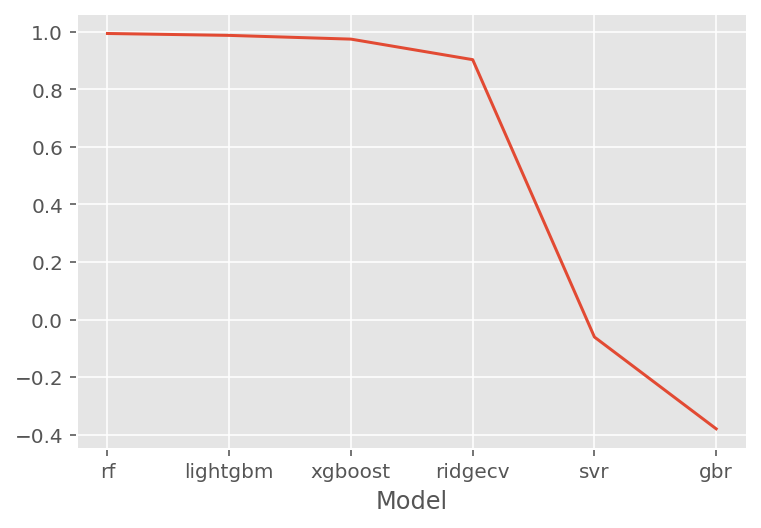

In [ ]:
df_scores.set_index('Model')['AR2'].plot.line('ro')

# Fit the models

In [ ]:
%%capture
ridge.fit(df_Xtrain,ser_ytrain);

In [ ]:
%%time
svr.fit(df_Xtrain,ser_ytrain);

CPU times: user 50.2 s, sys: 94.5 ms, total: 50.3 s
Wall time: 50.2 s


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('svr',
                 SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.008,
                     gamma=0.0003, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
%%time
rf.fit(df_Xtrain,ser_ytrain);

CPU times: user 8min 42s, sys: 979 ms, total: 8min 43s
Wall time: 4min 29s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=-1, oob_score=True,
                      random_state=100, verbose=0, warm_start=False)

In [ ]:
%%time
hist_gbr.fit(df_Xtrain,ser_ytrain);

CPU times: user 49min 44s, sys: 24.9 s, total: 50min 9s
Wall time: 25min 40s


HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=500, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=100,
                               scoring=make_scorer(calculate_adjusted_r2, nrows=17290, kcols=101),
                               tol=1e-07, validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [ ]:
%%time
model_xgb.fit(df_Xtrain,ser_ytrain);

CPU times: user 18.8 s, sys: 12.6 s, total: 31.3 s
Wall time: 31.2 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=1, reg_lambda=5, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

In [ ]:
%%time
model_lgb.fit(df_Xtrain,ser_ytrain);

CPU times: user 1.81 s, sys: 25 ms, total: 1.84 s
Wall time: 991 ms


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
%%capture
t_s = time.time()
stack.fit(np.array(df_Xtrain),np.array(ser_ytrain))
t_t = time.time() - t_s
m,s = divmod(t_t,60)
print(f'Time Taken : {m} min {s} sec')

In [ ]:
%%time
y_preds_stack = stack.predict(np.array(df_Xtrain))

CPU times: user 6min 57s, sys: 6.31 s, total: 7min 4s
Wall time: 3min 57s


In [ ]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
y_train = np.array(ser_ytrain)
nrows = df_Xtrain.shape[0]
kcols = df_Xtrain.shape[1]

10922.958452311159

In [ ]:
rmse_stack = rmse(y_train, y_preds_stack)
r2_stack = metrics.r2_score(y_train, y_preds_stack)
ar2_stack = calculate_adjusted_r2(y_train,y_preds_stack,nrows=nrows,kcols=kcols)

In [ ]:
df_scores.loc[len(df_scores)] = ['stack',rmse_stack,0,r2_stack,0,ar2_stack,0,0]
df_scores = df_scores.drop_duplicates()

df_scores

,Model,RMSE,RMSE_std,R2,R2_std,AR2,AR2_std,Time_Taken
0,rf,20498.398459,21701.317863,0.994065,0.010050,0.994031,0.010108,17 min 56.44 sec
1,lightgbm,38184.637408,18944.952525,0.987501,0.011244,0.987428,0.011309,4.53 sec
2,xgboost,54469.779570,27575.860015,0.974609,0.021074,0.974461,0.021197,2 min 16.64 sec
3,ridgecv,113786.703957,9183.497711,0.903633,0.007111,0.903072,0.007152,18.66 sec
4,svr,376295.885473,21587.107753,-0.054431,0.005762,-0.060565,0.005795,3 min 4.46 sec
5,gbr,429559.759594,35676.554119,-0.371514,0.081311,-0.379493,0.081784,38 min 23.84 sec
6,stack,10922.958452,0.000000,0.999115,0.000000,0.999110,0.000000,0


## Blend models and get predictions

In [ ]:
df_scores.sort_values('AR2',ascending=False)

,Model,RMSE,RMSE_std,R2,R2_std,AR2,AR2_std,Time_Taken
6,stack,10922.958452,0.000000,0.999115,0.000000,0.999110,0.000000,0
0,rf,20498.398459,21701.317863,0.994065,0.010050,0.994031,0.010108,17 min 56.44 sec
1,lightgbm,38184.637408,18944.952525,0.987501,0.011244,0.987428,0.011309,4.53 sec
2,xgboost,54469.779570,27575.860015,0.974609,0.021074,0.974461,0.021197,2 min 16.64 sec
3,ridgecv,113786.703957,9183.497711,0.903633,0.007111,0.903072,0.007152,18.66 sec
4,svr,376295.885473,21587.107753,-0.054431,0.005762,-0.060565,0.005795,3 min 4.46 sec
5,gbr,429559.759594,35676.554119,-0.371514,0.081311,-0.379493,0.081784,38 min 23.84 sec


In [ ]:
x = df_scores.query("""
Model in ['rf', 'xgboost', 'lightgbm', 'hist_gbr', 'ridgecv', 'svr','stack']
""")

x = x.sort_values('RMSE')
x

,Model,RMSE,RMSE_std,R2,R2_std,AR2,AR2_std,Time_Taken
6,stack,10922.958452,0.000000,0.999115,0.000000,0.999110,0.000000,0
0,rf,20498.398459,21701.317863,0.994065,0.010050,0.994031,0.010108,17 min 56.44 sec
1,lightgbm,38184.637408,18944.952525,0.987501,0.011244,0.987428,0.011309,4.53 sec
2,xgboost,54469.779570,27575.860015,0.974609,0.021074,0.974461,0.021197,2 min 16.64 sec
3,ridgecv,113786.703957,9183.497711,0.903633,0.007111,0.903072,0.007152,18.66 sec
4,svr,376295.885473,21587.107753,-0.054431,0.005762,-0.060565,0.005795,3 min 4.46 sec
5,hist_gbr,429559.759594,35676.554119,-0.371514,0.081311,-0.379493,0.081784,38 min 23.84 sec


In [ ]:
x['normalized'] = x['RMSE'].div(x['RMSE'].sum()).to_numpy()[::-1].round(2)
x

,Model,RMSE,RMSE_std,R2,R2_std,AR2,AR2_std,Time_Taken,normalized
6,stack,10922.958452,0.000000,0.999115,0.000000,0.999110,0.000000,0,0.41
0,rf,20498.398459,21701.317863,0.994065,0.010050,0.994031,0.010108,17 min 56.44 sec,0.36
1,lightgbm,38184.637408,18944.952525,0.987501,0.011244,0.987428,0.011309,4.53 sec,0.11
2,xgboost,54469.779570,27575.860015,0.974609,0.021074,0.974461,0.021197,2 min 16.64 sec,0.05
3,ridgecv,113786.703957,9183.497711,0.903633,0.007111,0.903072,0.007152,18.66 sec,0.04
4,svr,376295.885473,21587.107753,-0.054431,0.005762,-0.060565,0.005795,3 min 4.46 sec,0.02
5,hist_gbr,429559.759594,35676.554119,-0.371514,0.081311,-0.379493,0.081784,38 min 23.84 sec,0.01


In [ ]:
x['normalized'].sum()

1.0

In [ ]:
def blended_predictions(X):
    return ( stack.predict(np.array(X)) * 0.57 + 
            rf.predict(X) * 0.17 +
            model_xgb.predict(X) * 0.1 +
            model_lgb.predict(X) * 0.08 + 
            hist_gbr.predict(X) * 0.04 +
            ridgecv.predict(X) * 0.03 +
            svr.predict(X) * 0.01
            )

In [ ]:
%%time
y_preds_blend = blended_predictions(df_Xtrain)

CPU times: user 13min 46s, sys: 10.9 s, total: 13min 57s
Wall time: 7min 49s


In [ ]:
rmse_blend = rmse(y_train, y_preds_blend)
r2_blend = metrics.r2_score(y_train, y_preds_blend)
ar2_blend = calculate_adjusted_r2(y_train,y_preds_blend,nrows=nrows,kcols=kcols)

In [ ]:
df_scores

,Model,RMSE,RMSE_std,R2,R2_std,AR2,AR2_std,Time_Taken
0,rf,20498.398459,21701.317863,0.994065,0.010050,0.994031,0.010108,17 min 56.44 sec
1,lightgbm,38184.637408,18944.952525,0.987501,0.011244,0.987428,0.011309,4.53 sec
2,xgboost,54469.779570,27575.860015,0.974609,0.021074,0.974461,0.021197,2 min 16.64 sec
3,ridgecv,113786.703957,9183.497711,0.903633,0.007111,0.903072,0.007152,18.66 sec
4,svr,376295.885473,21587.107753,-0.054431,0.005762,-0.060565,0.005795,3 min 4.46 sec
5,hist_gbr,429559.759594,35676.554119,-0.371514,0.081311,-0.379493,0.081784,38 min 23.84 sec
6,stack,10922.958452,0.000000,0.999115,0.000000,0.999110,0.000000,0


In [ ]:
df_scores.loc[len(df_scores)] = ['blend',rmse_blend,0,r2_blend,0,ar2_blend,0,'7min']
df_scores = df_scores.drop_duplicates().sort_values('RMSE')

,Model,RMSE,RMSE_std,R2,R2_std,AR2,AR2_std,Time_Taken
6,stack,"10,923",0.000000,0.999115,0.000000,0.999110,0.000000,0
0,rf,"20,498",21701.317863,0.994065,0.010050,0.994031,0.010108,17 min 56.44 sec
7,blend,"26,477",0.000000,0.994799,0.000000,0.994768,0.000000,7min
1,lightgbm,"38,185",18944.952525,0.987501,0.011244,0.987428,0.011309,4.53 sec
2,xgboost,"54,470",27575.860015,0.974609,0.021074,0.974461,0.021197,2 min 16.64 sec
3,ridgecv,"113,787",9183.497711,0.903633,0.007111,0.903072,0.007152,18.66 sec
4,svr,"376,296",21587.107753,-0.054431,0.005762,-0.060565,0.005795,3 min 4.46 sec
5,hist_gbr,"429,560",35676.554119,-0.371514,0.081311,-0.379493,0.081784,38 min 23.84 sec


In [ ]:
display(df_scores.style
        .format({
            'RMSE': "{:,.0f}",
            'RMSE_std': "{:,.0f}",
            'R2': "{:,.4f}",
            'R2_std': "{:,.4f}",
            'AR2': "{:,.4f}",
            'AR2_std': "{:,.4f}",
            })
        .background_gradient(subset=['AR2'])
        .set_caption('Model evaluation for Train set')
        )

,Model,RMSE,RMSE_std,R2,R2_std,AR2,AR2_std,Time_Taken
6,stack,"10,923",0,0.9991,0.0000,0.9991,0.0000,0
0,rf,"20,498","21,701",0.9941,0.0100,0.9940,0.0101,17 min 56.44 sec
7,blend,"26,477",0,0.9948,0.0000,0.9948,0.0000,7min
1,lightgbm,"38,185","18,945",0.9875,0.0112,0.9874,0.0113,4.53 sec
2,xgboost,"54,470","27,576",0.9746,0.0211,0.9745,0.0212,2 min 16.64 sec
3,ridgecv,"113,787","9,183",0.9036,0.0071,0.9031,0.0072,18.66 sec
4,svr,"376,296","21,587",-0.0544,0.0058,-0.0606,0.0058,3 min 4.46 sec
5,hist_gbr,"429,560","35,677",-0.3715,0.0813,-0.3795,0.0818,38 min 23.84 sec


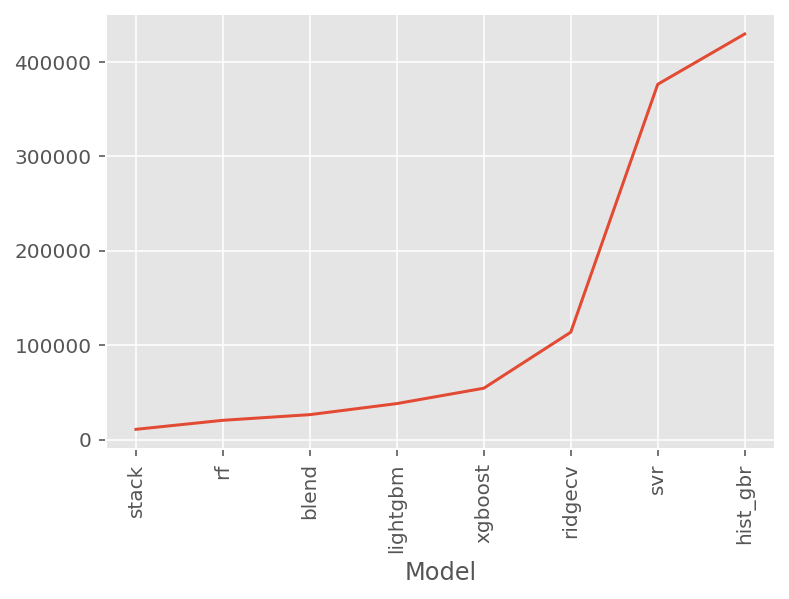

In [ ]:
df_scores.set_index('Model')['RMSE'].plot.line('ro',rot=90)

# Model Predictions on Test Data

In [ ]:
def adjustedR2(rsquared,nrows,kcols):
    return rsquared- (kcols-1)/(nrows-kcols) * (1-rsquared)

In [ ]:
model_names = ['ridgecv','svr','rf','hist_gbr','xgboost','lightgbm','stack']

In [ ]:
%%time

ypreds_ridgecv = ridgecv.predict(df_Xtest)
ypreds_svr = svr.predict(df_Xtest)
ypreds_rf = rf.predict(df_Xtest)
ypreds_hgbr = hist_gbr.predict(df_Xtest)
ypreds_xgb = model_xgb.predict(df_Xtest)
ypreds_lgb = model_lgb.predict(df_Xtest)

# this needs array
ypreds_stack = stack.predict(np.array(df_Xtest))

CPU times: user 5min 5s, sys: 9.42 s, total: 5min 15s
Wall time: 2min 51s


In [ ]:
ypreds = [ypreds_ridgecv, ypreds_svr,ypreds_rf,ypreds_hgbr,
          ypreds_xgb, ypreds_lgb,ypreds_stack]

rmses = [rmse(np.array(ser_ytest), yp) for yp in ypreds]
r2s = [sklearn.metrics.r2_score(np.array(ser_ytest), yp) for yp in ypreds]


ar2s = [adjustedR2(r2, nrows=df_Xtest.shape[0], kcols=df_Xtest.shape[1]) for r2 in r2s]

In [ ]:
df_eval = pd.DataFrame({'Model': model_names,
                        'RMSE': rmses,
                        'R-squared': r2s,
                        'Adjusted-Rsquared': ar2s})

df_eval = df_eval.sort_values('RMSE',ascending=True)

,Model,RMSE,R-squared,Adjusted-Rsquared
2,rf,26075.804270,0.994955,0.994835
6,stack,49751.483209,0.981634,0.981199
5,lightgbm,51940.519390,0.979982,0.979508
4,xgboost,52596.952957,0.979473,0.978987
0,ridgecv,111052.816460,0.908490,0.906322
1,svr,377212.837380,-0.055802,-0.080809
3,hist_gbr,475583.269539,-0.678274,-0.718024


In [ ]:
display(df_eval.style
        .format({
            'RMSE': "{:,.0f}",
            'RMSE_std': "{:,.0f}",
            'R2': "{:,.4f}",
            'R2_std': "{:,.4f}",
            'AR2': "{:,.4f}",
            'AR2_std': "{:,.4f}",
            })
        .background_gradient(subset=['Adjusted-Rsquared'])
        .set_caption('Model evaluation for Test set')
        )

,Model,RMSE,R-squared,Adjusted-Rsquared
2,rf,"26,076",0.994955,0.994835
6,stack,"49,751",0.981634,0.981199
5,lightgbm,"51,941",0.979982,0.979508
4,xgboost,"52,597",0.979473,0.978987
0,ridgecv,"111,053",0.908490,0.906322
1,svr,"377,213",-0.055802,-0.080809
3,hist_gbr,"475,583",-0.678274,-0.718024


# Time Taken

In [ ]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 6 hr 36 min 53 secs
